<a href="https://colab.research.google.com/github/Ianfm94/Financial_Analysis/blob/master/LSTM_Workings/Notebooks/3.%20LSTM_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importing required packages
import pandas as pd
import numpy as np
from numpy import array
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout, Softmax, BatchNormalization
from keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from google.colab import  drive
drive.mount('/drive', force_remount=True)
print(tf.__version__)

Mounted at /drive
2.2.0


In [4]:
# Reading in training and labels data

train = pd.read_csv('/drive/My Drive/Colab Notebooks/Dissertation Workings/CSV Files/MC_Returns.csv',
  index_col = 0)
train = pd.DataFrame(train)
labels = pd.read_csv('/drive/My Drive/Colab Notebooks/Dissertation Workings/CSV Files/MC_Labels.csv',
  index_col = 0)
labels = pd.DataFrame(labels)

# In the labels file 1 = Jump, 2 = Volatility

print(train.head(n=10))
print(train.shape)
print()
print(labels.head(n=10))
print(labels.shape)

train  = train.to_numpy()
labels  = labels.to_numpy()
np.random.seed(111)

# Splitting between train, validation and test data
x_train,x_valid,y_train,y_valid = train_test_split(train, labels,
    test_size=0.5, random_state=111)

print("Total number of training samples: ", x_train.shape)
print("Total number of validation samples: ", x_valid.shape)

n_timesteps = 1

x_train = np.reshape(x_train, (195, n_timesteps, 2500))
x_valid = np.reshape(x_valid, (195, n_timesteps, 2500))
y_train = np.reshape(y_train, (195, n_timesteps, 2500))
y_valid = np.reshape(y_valid, (195, n_timesteps, 2500))

x_train = np.array(x_train)
y_train = np.array(y_train)
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)

          0         1         2  ...       192       193       194
0 -0.449331  0.408150  0.680784  ... -0.245403 -0.334647 -0.056418
1 -0.043046 -0.005185  0.589643  ...  0.040456  0.101562  0.197471
2 -0.052160  0.386235  0.600521  ... -0.090358 -0.285487  0.550013
3  0.243190 -0.259726 -0.029058  ...  0.431808  0.379560 -0.045728
4 -0.438716  0.540272  0.258679  ... -0.541605  0.055640  0.606013
5  0.398286 -0.168673 -0.552268  ... -0.263809 -0.380554  0.074685
6  0.380511 -0.087769 -0.145791  ... -1.181316 -0.311074 -0.136864
7  0.168248  0.005422  0.161888  ... -0.731778 -0.509793  0.360278
8  0.169932 -0.189484 -0.251788  ...  0.809003 -0.242841 -0.000701
9 -0.051600  0.262170  0.628605  ...  0.624741 -0.231580 -0.075045

[10 rows x 195 columns]
(5000, 195)

   0  1  2  3  4  5  6  7  8  ...  186  187  188  189  190  191  192  193  194
0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
1  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    

In [4]:
# LSTM Workings

model = Sequential()
model.add(Bidirectional(LSTM(units=1250, return_sequences = True, input_shape = (n_timesteps, 2500))))
model.add(Dropout(0.2))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
results = model.fit(x_train, y_train, epochs=100, batch_size=32)
print(model.summary())

Epoch 1/100
195/195 [==============================] - 3s 14ms/step - loss: 0.0396 - accuracy: 0.9989
Epoch 2/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0169 - accuracy: 0.9992
Epoch 3/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 0.9993
Epoch 4/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.9992
Epoch 5/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.9993
Epoch 6/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.9992
Epoch 7/100
195/195 [==============================] - 0s 2ms/step - loss: 7.9939e-04 - accuracy: 0.9992
Epoch 8/100
195/195 [==============================] - 0s 2ms/step - loss: 7.3069e-04 - accuracy: 0.9992
Epoch 9/100
195/195 [==============================] - 0s 2ms/step - loss: 5.7662e-04 - accuracy: 0.9992
Epoch 10/100
195/195 [==============================] - 0s 2ms/step - loss: 5.

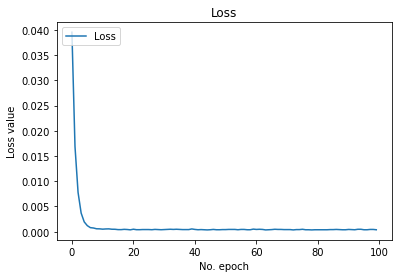

In [5]:
plt.plot(results.history['loss'], label='Loss')

plt.title('Loss')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [6]:
# LSTM Workings_2

model_1 = Sequential()
model_1.add(Bidirectional(LSTM(units=2500, return_sequences = True, input_shape = (n_timesteps, 2500))))
model_1.add(LSTM(2500, return_sequences = True))
model_1.add(Dropout(0.2))

model_1.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

results_1 = model_1.fit(x_train, y_train, epochs=100, batch_size=32)

print(model_1.summary())

Epoch 1/100
195/195 [==============================] - 3s 14ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 2/100
195/195 [==============================] - 2s 8ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 3/100
195/195 [==============================] - 2s 8ms/step - loss: 5.8777e-04 - accuracy: 1.0000
Epoch 4/100
195/195 [==============================] - 2s 8ms/step - loss: 4.1855e-04 - accuracy: 1.0000
Epoch 5/100
195/195 [==============================] - 2s 8ms/step - loss: 3.7306e-04 - accuracy: 1.0000
Epoch 6/100
195/195 [==============================] - 1s 8ms/step - loss: 4.2923e-04 - accuracy: 1.0000
Epoch 7/100
195/195 [==============================] - 1s 8ms/step - loss: 3.9194e-04 - accuracy: 1.0000
Epoch 8/100
195/195 [==============================] - 2s 8ms/step - loss: 4.1968e-04 - accuracy: 1.0000
Epoch 9/100
195/195 [==============================] - 2s 8ms/step - loss: 3.8621e-04 - accuracy: 1.0000
Epoch 10/100
195/195 [==============================] - 2s 8ms

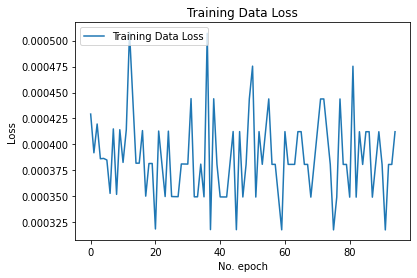

In [7]:
plt.plot(results_1.history['loss'][5:], label='Training Data Loss')

plt.title('Training Data Loss')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [8]:
# LSTM Workings_3

model_2 = Sequential()
model_2.add(Bidirectional(LSTM(units=2500, return_sequences = True, input_shape = (n_timesteps, 2500))))
model_2.add(LSTM(2500, return_sequences = True))
model_2.add(Dropout(0.2))

model_2.compile(loss='mse', optimizer="RMSprop", metrics=['accuracy'])

results_2 = model_2.fit(x_train, y_train, epochs=100, batch_size=32)

print(model_2.summary())

Epoch 1/100
195/195 [==============================] - 2s 12ms/step - loss: 3.2803e-04 - accuracy: 0.0000e+00
Epoch 2/100
195/195 [==============================] - 1s 6ms/step - loss: 1.9460e-04 - accuracy: 0.0462
Epoch 3/100
195/195 [==============================] - 1s 7ms/step - loss: 1.1870e-04 - accuracy: 0.0667
Epoch 4/100
195/195 [==============================] - 1s 6ms/step - loss: 6.8690e-05 - accuracy: 0.0821
Epoch 5/100
195/195 [==============================] - 1s 7ms/step - loss: 5.6312e-05 - accuracy: 0.0513
Epoch 6/100
195/195 [==============================] - 1s 6ms/step - loss: 2.2857e-05 - accuracy: 0.0923
Epoch 7/100
195/195 [==============================] - 1s 7ms/step - loss: 3.1543e-05 - accuracy: 0.0718
Epoch 8/100
195/195 [==============================] - 1s 7ms/step - loss: 1.8632e-05 - accuracy: 0.0821
Epoch 9/100
195/195 [==============================] - 1s 6ms/step - loss: 2.1638e-05 - accuracy: 0.0667
Epoch 10/100
195/195 [============================

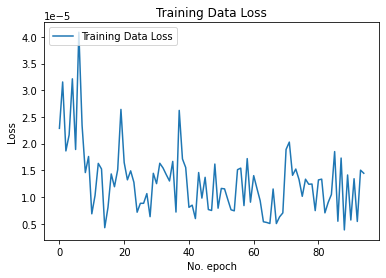

In [9]:
plt.plot(results_2.history['loss'][5:], label='Training Data Loss')

plt.title('Training Data Loss')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [10]:
# LSTM Workings_4

model_3 = Sequential()
model_3.add(Bidirectional(LSTM(units=2500, return_sequences = True, input_shape = (n_timesteps, 2500))))
model_3.add(LSTM(2500, return_sequences = True))
model_3.add(Dropout(0.2))

model_3.compile(loss='hinge', optimizer="RMSprop", metrics=['accuracy'])

results_3 = model_3.fit(x_train, y_train, epochs=100, batch_size=32, shuffle=True)

print(model_3.summary())

Epoch 1/100
195/195 [==============================] - 2s 12ms/step - loss: 0.9943 - accuracy: 0.0205
Epoch 2/100
195/195 [==============================] - 1s 7ms/step - loss: 0.4161 - accuracy: 0.1744
Epoch 3/100
195/195 [==============================] - 1s 7ms/step - loss: 0.2446 - accuracy: 0.1590
Epoch 4/100
195/195 [==============================] - 1s 7ms/step - loss: 0.2413 - accuracy: 0.1744
Epoch 5/100
195/195 [==============================] - 1s 7ms/step - loss: 0.2393 - accuracy: 0.1949
Epoch 6/100
195/195 [==============================] - 1s 7ms/step - loss: 0.2389 - accuracy: 0.1897
Epoch 7/100
195/195 [==============================] - 1s 7ms/step - loss: 0.2394 - accuracy: 0.1949
Epoch 8/100
195/195 [==============================] - 1s 7ms/step - loss: 0.2388 - accuracy: 0.2103
Epoch 9/100
195/195 [==============================] - 1s 7ms/step - loss: 0.2375 - accuracy: 0.2000
Epoch 10/100
195/195 [==============================] - 1s 7ms/step - loss: 0.2392 - accur

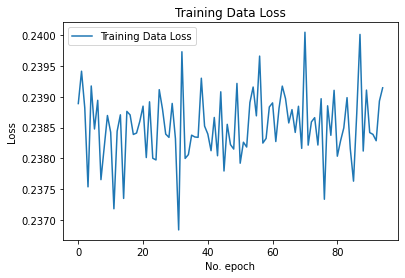

In [11]:
plt.plot(results_3.history['loss'][5:], label='Training Data Loss')

plt.title('Training Data Loss')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [13]:
# LSTM Workings_4b

model_3 = Sequential()
model_3.add(Bidirectional(LSTM(units=2500, return_sequences = True, input_shape = (n_timesteps, 2500))))
model_3.add(LSTM(2500, return_sequences = True))
model_3.add(Dropout(0.2))

lr_schedule = LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))

optimizer = SGD(lr=1e-8, momentum=0.9)

model_3.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=(["accuracy"]))

results_3 = model_3.fit(x_train, y_train, epochs=100, batch_size=32, 
                        shuffle=True, callbacks=[lr_schedule])

print(model_3.summary())

Epoch 1/100
195/195 [==============================] - 2s 10ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 2/100
195/195 [==============================] - 1s 4ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 3/100
195/195 [==============================] - 1s 4ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 4/100
195/195 [==============================] - 1s 4ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 5/100
195/195 [==============================] - 1s 4ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 6/100
195/195 [==============================] - 1s 4ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 7/100
195/195 [==============================] - 1s 4ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 8/100
195/195 [==============================] - 1s 4ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 9/100
195/195 [==============================] - 1s 4ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 10/100
195/195 [==============================] - 1s 4ms/step - loss: 0.0066 - accur

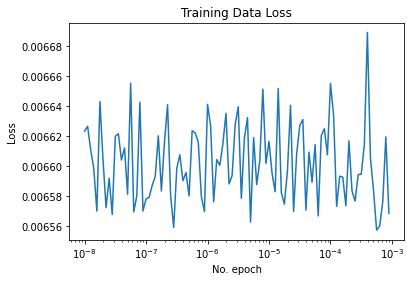

In [15]:
plt.semilogx(results_3.history["lr"], results_3.history["loss"])

#plt.plot(results_3.history['loss'], label='Training Data Loss')

plt.title('Training Data Loss')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.show()


In [16]:
# LSTM Workings_4c

model_4 = Sequential()
model_4.add(Bidirectional(LSTM(units=2500, return_sequences = True, 
                               input_shape = (n_timesteps, 2500))))
model_4.add(LSTM(2500, return_sequences = True))
model_4.add(Dropout(0.2))

model_4.compile(loss='squared_hinge', optimizer="RMSprop",
              metrics=(["mse", 'accuracy']), verbose=1)

results_4 = model_4.fit(x_train, y_train, epochs=100, batch_size=32, 
                        shuffle=True, validation_data=(x_valid, y_valid))

overall_mse = sum(results_4.history['mse']) / len(results_4.history['mse'])
sqrt_mse = overall_mse**0.5
print('Overall MSE =  {}'.format(overall_mse))
print('Overall RMSE =  {}'.format(sqrt_mse))

print(model_4.summary())

Train on 195 samples, validate on 195 samples
Epoch 1/100
195/195 [==============================] - 3s 15ms/step - loss: 0.9758 - mse: 0.0052 - accuracy: 0.0308 - val_loss: 0.8551 - val_mse: 0.0300 - val_accuracy: 0.0051
Epoch 2/100
195/195 [==============================] - 1s 7ms/step - loss: 0.2895 - mse: 0.5208 - accuracy: 0.1897 - val_loss: 0.7706 - val_mse: 0.0684 - val_accuracy: 0.0000e+00
Epoch 3/100
195/195 [==============================] - 1s 7ms/step - loss: 0.2224 - mse: 0.6758 - accuracy: 0.1744 - val_loss: 0.7577 - val_mse: 0.0745 - val_accuracy: 0.0000e+00
Epoch 4/100
195/195 [==============================] - 1s 7ms/step - loss: 0.2135 - mse: 0.6920 - accuracy: 0.1897 - val_loss: 0.7472 - val_mse: 0.0805 - val_accuracy: 0.0000e+00
Epoch 5/100
195/195 [==============================] - 1s 7ms/step - loss: 0.2071 - mse: 0.7034 - accuracy: 0.1846 - val_loss: 0.7364 - val_mse: 0.0870 - val_accuracy: 0.0000e+00
Epoch 6/100
195/195 [==============================] - 1s 7ms/

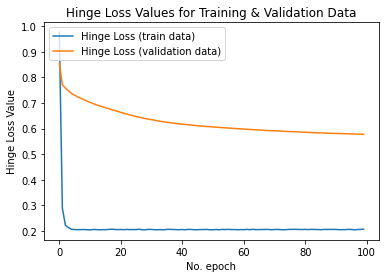

In [17]:
plt.plot(results_4.history['loss'], label='Hinge Loss (train data)')
plt.plot(results_4.history['val_loss'], label='Hinge Loss (validation data)')
plt.title('Hinge Loss Values for Training & Validation Data')
plt.ylabel('Hinge Loss Value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

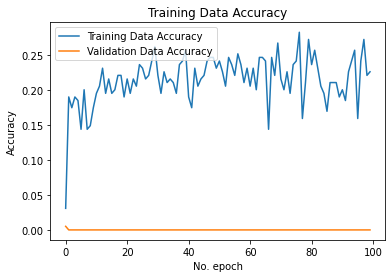

In [18]:
plt.plot(results_4.history['accuracy'], label='Training Data Accuracy')
plt.plot(results_4.history['val_accuracy'], label='Validation Data Accuracy')
plt.title('Training Data Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [4]:
# LSTM Workings_5

model_5 = Sequential()
model_5.add(Bidirectional(LSTM(units=2500, return_sequences = True, 
                               input_shape = (n_timesteps, 2500))))
model_5.add(LSTM(2500, return_sequences = True))
model_5.add(Dropout(0.2))

model_5.compile(loss='binary_crossentropy', optimizer="Adam",
              metrics=(["mse", 'accuracy']), verbose=1)

results_5 = model_5.fit(x_train, y_train, epochs=100, batch_size=32, 
                        shuffle=True, validation_data=(x_valid, y_valid))

print(model_5.summary())

Train on 195 samples, validate on 195 samples
Epoch 1/100
195/195 [==============================] - 3s 17ms/step - loss: 0.0063 - mse: 3.3772e-04 - accuracy: 1.0000 - val_loss: 0.0057 - val_mse: 2.8518e-04 - val_accuracy: 1.0000
Epoch 2/100
195/195 [==============================] - 2s 8ms/step - loss: 0.0014 - mse: 8.6353e-04 - accuracy: 1.0000 - val_loss: 0.0056 - val_mse: 4.0425e-04 - val_accuracy: 1.0000
Epoch 3/100
195/195 [==============================] - 2s 8ms/step - loss: 5.2306e-04 - mse: 0.0031 - accuracy: 1.0000 - val_loss: 0.0065 - val_mse: 6.3006e-04 - val_accuracy: 1.0000
Epoch 4/100
195/195 [==============================] - 2s 8ms/step - loss: 5.1029e-04 - mse: 0.0056 - accuracy: 1.0000 - val_loss: 0.0073 - val_mse: 8.3123e-04 - val_accuracy: 1.0000
Epoch 5/100
195/195 [==============================] - 2s 8ms/step - loss: 5.2685e-04 - mse: 0.0073 - accuracy: 1.0000 - val_loss: 0.0078 - val_mse: 9.6500e-04 - val_accuracy: 1.0000
Epoch 6/100
195/195 [=================

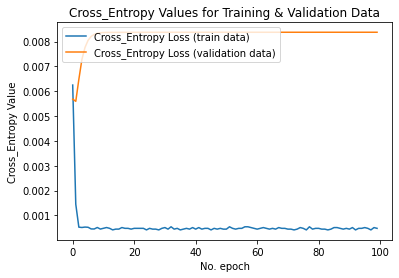

In [5]:
plt.plot(results_5.history['loss'], label='Cross_Entropy Loss (train data)')
plt.plot(results_5.history['val_loss'], label='Cross_Entropy Loss (validation data)')
plt.title('Cross_Entropy Values for Training & Validation Data')
plt.ylabel('Cross_Entropy Value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

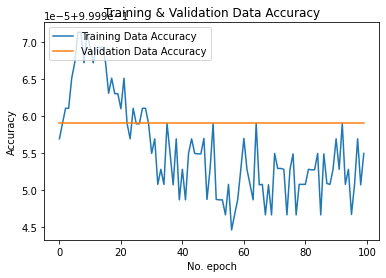

In [6]:
plt.plot(results_5.history['accuracy'], label='Training Data Accuracy')
plt.plot(results_5.history['val_accuracy'], label='Validation Data Accuracy')
plt.title('Training & Validation Data Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [5]:
# LSTM Workings_6

model_6 = Sequential()
model_6.add(Bidirectional(LSTM(units=2500, return_sequences = True, 
                               input_shape = (n_timesteps, 2500))))
model_6.add(LSTM(2500, return_sequences=True))
model_6.add(Dropout(0.2))

model_6.add(Dense(2500, activation='sigmoid'))

model_6.compile(loss='binary_crossentropy', optimizer="RMSprop",
              metrics=(['accuracy']), verbose=1)

results_6 = model_6.fit(x_train, y_train, epochs=100, batch_size=32, 
                        shuffle=True, validation_data=(x_valid, y_valid))

print(model_6.summary())

Train on 195 samples, validate on 195 samples
Epoch 1/100
195/195 [==============================] - 4s 22ms/step - loss: 0.6827 - accuracy: 0.5825 - val_loss: 0.6076 - val_accuracy: 0.6228
Epoch 2/100
195/195 [==============================] - 1s 7ms/step - loss: 0.0490 - accuracy: 0.9892 - val_loss: 0.5375 - val_accuracy: 0.6416
Epoch 3/100
195/195 [==============================] - 1s 7ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.5385 - val_accuracy: 0.6375
Epoch 4/100
195/195 [==============================] - 1s 7ms/step - loss: 8.5226e-04 - accuracy: 1.0000 - val_loss: 0.5400 - val_accuracy: 0.6382
Epoch 5/100
195/195 [==============================] - 1s 7ms/step - loss: 6.0701e-04 - accuracy: 1.0000 - val_loss: 0.5416 - val_accuracy: 0.6398
Epoch 6/100
195/195 [==============================] - 1s 7ms/step - loss: 4.8421e-04 - accuracy: 1.0000 - val_loss: 0.5437 - val_accuracy: 0.6389
Epoch 7/100
195/195 [==============================] - 1s 7ms/step - loss: 4.0890e-

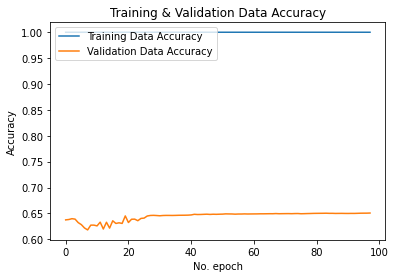

In [6]:
plt.plot(results_6.history['accuracy'][2:], label='Training Data Accuracy')
plt.plot(results_6.history['val_accuracy'][2:], label='Validation Data Accuracy')
plt.title('Training & Validation Data Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

Train on 195 samples, validate on 195 samples
Epoch 1/100
195/195 [==============================] - 2s 11ms/step - loss: 1.0000 - accuracy: 0.0000e+00 - val_loss: 0.9999 - val_accuracy: 0.0000e+00
Epoch 2/100
195/195 [==============================] - 1s 5ms/step - loss: 0.9998 - accuracy: 0.0000e+00 - val_loss: 0.9997 - val_accuracy: 0.0000e+00
Epoch 3/100
195/195 [==============================] - 1s 5ms/step - loss: 0.9995 - accuracy: 0.0000e+00 - val_loss: 0.9995 - val_accuracy: 0.0000e+00
Epoch 4/100
195/195 [==============================] - 1s 5ms/step - loss: 0.9993 - accuracy: 0.0000e+00 - val_loss: 0.9992 - val_accuracy: 0.0000e+00
Epoch 5/100
195/195 [==============================] - 1s 5ms/step - loss: 0.9990 - accuracy: 0.0000e+00 - val_loss: 0.9989 - val_accuracy: 0.0000e+00
Epoch 6/100
195/195 [==============================] - 1s 4ms/step - loss: 0.9987 - accuracy: 0.0000e+00 - val_loss: 0.9986 - val_accuracy: 0.0000e+00
Epoch 7/100
195/195 [==========================

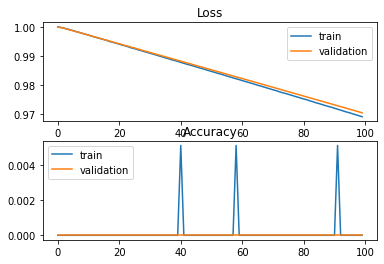

In [9]:
# LSTM Workings_6b

model_6b = Sequential()
model_6b.add(Bidirectional(LSTM(units=2500, return_sequences = True, 
                               input_shape = (n_timesteps, 2500), 
                                kernel_initializer='he_uniform')))
model_6b.add(LSTM(2500, return_sequences = True))
model_6b.add(Dropout(0.2))

model_6b.add(Dense(2500, activation='tanh'))
opt = SGD(lr=0.01, momentum=0.9)

model_6b.compile(loss='hinge', optimizer=opt, 
                 metrics=['accuracy'], verbose=0)

results_6b = model_6b.fit(x_train, y_train, epochs=100, batch_size=32, 
                        shuffle=True, validation_data=(x_valid, y_valid))

print(model_6b.summary())

# plot loss during training

plt.subplot(211)
plt.title('Loss')
plt.plot(results_6b.history['loss'], label='train')
plt.plot(results_6b.history['val_loss'], label='validation')
plt.legend()

# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(results_6b.history['accuracy'], label='train')
plt.plot(results_6b.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

Train on 195 samples, validate on 195 samples
Epoch 1/100
195/195 [==============================] - 2s 11ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 2/100
195/195 [==============================] - 1s 4ms/step - loss: 0.0130 - accuracy: 1.0000 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 3/100
195/195 [==============================] - 1s 5ms/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 4/100
195/195 [==============================] - 1s 4ms/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 5/100
195/195 [==============================] - 1s 4ms/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 6/100
195/195 [==============================] - 1s 4ms/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 7/100
195/195 [==============================] - 1s 4ms/step - loss: 0.0126 - accuracy: 1

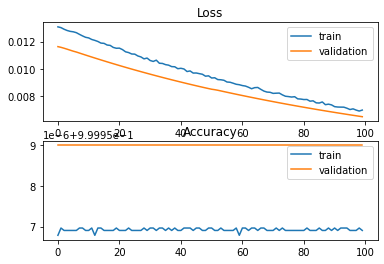

In [10]:
# LSTM Workings_6c

model_6c = Sequential()
model_6c.add(Bidirectional(LSTM(units=2500, return_sequences = True, 
                               input_shape = (n_timesteps, 2500), 
                                kernel_initializer='he_uniform')))
model_6c.add(LSTM(2500, return_sequences = True))
model_6c.add(Dropout(0.2))

model_6c.add(Dense(2500, activation='tanh'))
model_6c.add(Dropout(0.2))

opt = SGD(lr=0.01, momentum=0.9)

model_6c.compile(loss='binary_crossentropy', optimizer=opt, 
                 metrics=['accuracy'], verbose=0)

results_6c = model_6c.fit(x_train, y_train, epochs=100, batch_size=32, 
                        shuffle=True, validation_data=(x_valid, y_valid))

print(model_6c.summary())

# plot loss during training

plt.subplot(211)
plt.title('Loss')
plt.plot(results_6c.history['loss'], label='train')
plt.plot(results_6c.history['val_loss'], label='validation')
plt.legend()

# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(results_6c.history['accuracy'], label='train')
plt.plot(results_6c.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

Train on 195 samples, validate on 195 samples
Epoch 1/100
195/195 [==============================] - 4s 23ms/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 2/100
195/195 [==============================] - 2s 8ms/step - loss: 0.0028 - accuracy: 0.9945 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 3/100
195/195 [==============================] - 2s 8ms/step - loss: 4.1609e-04 - accuracy: 0.8489 - val_loss: 0.0182 - val_accuracy: 1.0000
Epoch 4/100
195/195 [==============================] - 2s 8ms/step - loss: 4.7611e-04 - accuracy: 0.4518 - val_loss: 0.0235 - val_accuracy: 0.9999
Epoch 5/100
195/195 [==============================] - 2s 9ms/step - loss: 4.4705e-04 - accuracy: 0.2999 - val_loss: 0.0270 - val_accuracy: 0.9997
Epoch 6/100
195/195 [==============================] - 2s 8ms/step - loss: 4.1185e-04 - accuracy: 0.2564 - val_loss: 0.0289 - val_accuracy: 0.9993
Epoch 7/100
195/195 [==============================] - 2s 8ms/step - loss: 4.12

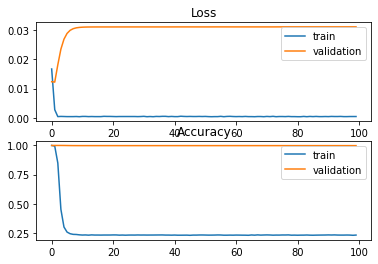

In [4]:
# LSTM Workings_7

model_7 = Sequential()
model_7.add(Bidirectional(LSTM(units=2500, return_sequences = True, 
                               input_shape = (n_timesteps, 2500), 
                                kernel_initializer='random_normal')))
model_7.add(LSTM(2500, return_sequences = True))
model_7.add(Dropout(0.2))

model_7.add(Dense(2500, activation='tanh'))
model_7.add(Dropout(0.2))

model_7.compile(loss='binary_crossentropy', optimizer='Adam', 
                 metrics=['accuracy'], verbose=0)

results_7 = model_7.fit(x_train, y_train, epochs=100, batch_size=32, 
                        shuffle=True, validation_data=(x_valid, y_valid))

print(model_7.summary())

# plot loss during training

plt.subplot(211)
plt.title('Loss')
plt.plot(results_7.history['loss'], label='train')
plt.plot(results_7.history['val_loss'], label='validation')
plt.legend()

# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(results_7.history['accuracy'], label='train')
plt.plot(results_7.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

Train on 195 samples, validate on 195 samples
Epoch 1/100
195/195 [==============================] - 4s 22ms/step - loss: 0.0175 - accuracy: 1.0000 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 2/100
195/195 [==============================] - 1s 7ms/step - loss: 0.0118 - accuracy: 0.8708 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 3/100
195/195 [==============================] - 1s 7ms/step - loss: 0.0097 - accuracy: 0.6857 - val_loss: 0.0126 - val_accuracy: 0.9999
Epoch 4/100
195/195 [==============================] - 1s 7ms/step - loss: 7.3410e-04 - accuracy: 0.6115 - val_loss: 0.0129 - val_accuracy: 0.9999
Epoch 5/100
195/195 [==============================] - 1s 7ms/step - loss: 5.1666e-04 - accuracy: 0.5908 - val_loss: 0.0130 - val_accuracy: 0.9999
Epoch 6/100
195/195 [==============================] - 1s 7ms/step - loss: 5.4284e-04 - accuracy: 0.5879 - val_loss: 0.0132 - val_accuracy: 0.9999
Epoch 7/100
195/195 [==============================] - 1s 7ms/step - loss: 5.1396e-

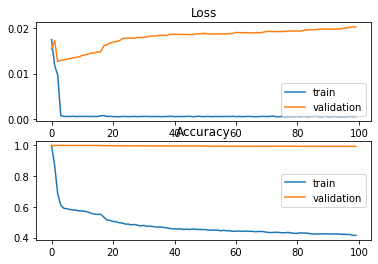

In [5]:
# LSTM Workings_7b

model_7b = Sequential()
model_7b.add(Bidirectional(LSTM(units=2500, return_sequences = True, 
                               input_shape = (n_timesteps, 2500), 
                                kernel_initializer='glorot_normal')))
model_7b.add(LSTM(2500, return_sequences = True))
model_7b.add(Dropout(0.2))

model_7b.add(Dense(2500, activation='tanh'))
model_7b.add(Dropout(0.2))

model_7b.compile(loss='binary_crossentropy', optimizer='RMSprop', 
                 metrics=['accuracy'], verbose=0)

results_7b = model_7b.fit(x_train, y_train, epochs=100, batch_size=32, 
                        shuffle=True, validation_data=(x_valid, y_valid))

print(model_7b.summary())

# plot loss during training

plt.subplot(211)
plt.title('Loss')
plt.plot(results_7b.history['loss'], label='train')
plt.plot(results_7b.history['val_loss'], label='validation')
plt.legend()

# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(results_7b.history['accuracy'], label='train')
plt.plot(results_7b.history['val_accuracy'], label='validation')
plt.legend()
plt.show()